In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Hitters.csv')

In [3]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
df['Salary'].fillna(df['Salary'].median(),inplace=True)

In [6]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [7]:
df['CRuns'].value_counts()

20      5
156     4
32      3
34      3
379     3
       ..
1070    1
1172    1
284     1
703     1
775     1
Name: CRuns, Length: 261, dtype: int64

In [8]:
df['Years'].value_counts()

4     36
5     30
6     30
3     29
2     25
1     22
7     21
8     16
9     15
10    14
12    14
14    13
13    12
11    10
15     9
18     7
17     7
16     7
20     2
24     1
23     1
19     1
Name: Years, dtype: int64

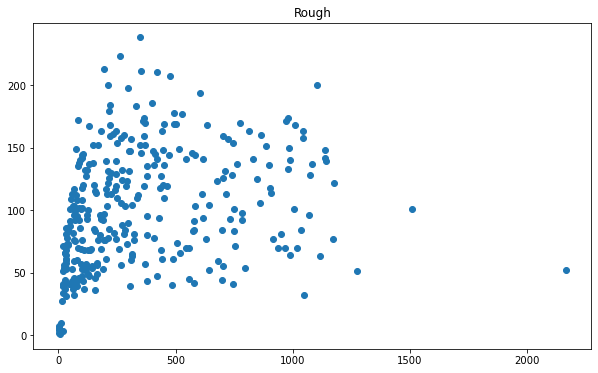

In [15]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,6))
plt.title('Rough')
plt.scatter(df['CRuns'],df['Hits'])

In [16]:
x=df[['CRuns','Hits']]

In [17]:
from sklearn.cluster import KMeans,AgglomerativeClustering


In [18]:
sse=[]

for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [19]:
sse

[36524916.27329193,
 10612574.042518316,
 5948885.904170572,
 3891577.5338283153,
 2649763.441444023,
 1922178.9951395844,
 1595873.6615821626,
 1340809.0641562063,
 1113371.433528726,
 978427.068457015,
 874039.0230655042,
 790241.0096670361,
 734775.9116553881,
 640424.265624948,
 589556.856282143]

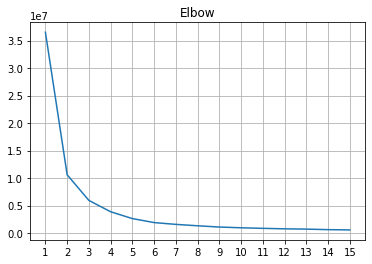

In [20]:
plt.title('Elbow')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse)

In [21]:
from sklearn.metrics import silhouette_score

In [23]:
silh=[]
for k in range(2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)

<BarContainer object of 14 artists>

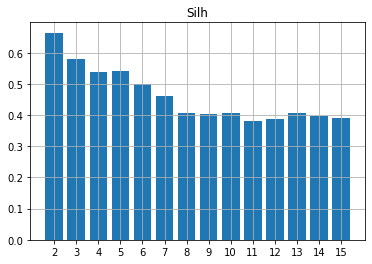

In [24]:
plt.title('Silh')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh)

In [25]:
agl=AgglomerativeClustering(n_clusters=2)
labels=agl.fit_predict(x)

In [26]:
labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

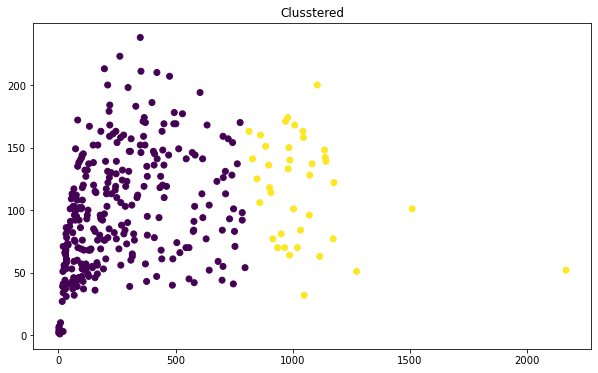

In [27]:
plt.figure(figsize=(10,6))
plt.title('Clusstered')
plt.scatter(x['CRuns'],x['Hits'],c=labels)